In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [96]:
negativeQuestions = ["[I dislike singing]", "[I do not find karaoke amusing]", "[The time goes very slow when I do karaoke]", "[I feel bored]", "[I prefer karaoke without any effects]", "[I quickly get exhausted by new technologies]", "[I do not like karaoke]"]

def depolarize(s):
    out = [5 - int(item) + 1 for item in s]
    return out

def adjust(dataframe):
    dataframe.replace({ "Completely agree" : 5,
                        "Somewhat agree" : 4,
                        "Neutral" : 3,
                        "Somewhat disagree" : 2,
                        "Completely disagree" : 1 }, inplace=True)

    dataframe.drop(columns=["Timestamp"], inplace=True)
    
    dataframe[negativeQuestions] = dataframe[negativeQuestions].apply(depolarize)
    dataframe = dataframe.drop(columns=["Name"]).join(dataframe["Name"])

    renameDict = {index : dataframe["Name"][index] for index in range(len(dataframe["Name"]))}
    dataframe = dataframe.rename(index=renameDict).drop(columns=["Name"])
    
    return dataframe

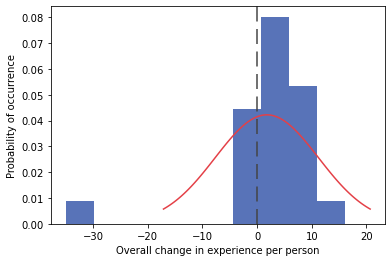

In [97]:
resWithout = pd.read_excel("results.xlsx", "without")
resWith = pd.read_excel("results.xlsx", "with")

resWithout, resWith = (adjust(resWithout), adjust(resWith))

differences = resWith.sum(axis=1) - resWithout.sum(axis=1)

mu = differences.mean()
variance = differences.var()
sigma = differences.std()
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#E44047")
plt.axvline(x=0, color="#444444").set_dashes([10, 5])
plt.hist(differences, density=True, bins=10, color="#5873B8")
plt.xlabel("Overall change in experience per person")
plt.ylabel("Probability of occurrence")
plt.show()

In [98]:
resWith

,[I like Karaoke],[I dislike singing],[I feel entertained],[I feel excited],[I do not find karaoke amusing],[The time goes very slow when I do karaoke],[I feel bored],[I think an option to add funny effects to the voice would make karaoke more enjoyable],[I like singing],[I prefer karaoke without any effects],[I quickly get exhausted by new technologies],[I do not like karaoke],[I feel the time flies when I do karaoke],[I like exploring new technologies]
Karoline,4,3,4,4,3,4,4,5,4,4,4,4,4,4
Esben,3,2,4,4,4,4,3,4,3,4,3,4,4,5
Kathrine,1,1,4,3,1,4,4,4,5,4,2,2,2,2
Bianka,1,1,1,1,1,1,1,1,1,1,5,1,1,1
Lucia,4,5,3,4,5,5,3,4,5,3,5,5,4,3
Katarina,5,5,4,3,4,3,4,4,5,4,3,5,4,4
Søren,5,2,4,4,4,3,5,5,2,5,5,4,5,5
Max Konge,4,5,4,3,2,4,5,4,5,3,4,4,3,4
Bitch-ass Nigga,3,2,5,4,3,5,4,5,2,4,5,3,3,5
Kati,5,5,5,5,5,5,5,5,5,2,5,4,5,5


In [99]:
resWithSum =resWith.apply(pd.Series.value_counts, axis=0).fillna(0)

In [55]:
resWithSum

,[I like Karaoke],[I dislike singing],[I feel entertained],[I feel excited],[I do not find karaoke amusing],[The time goes very slow when I do karaoke],[I feel bored],[I think an option to add funny effects to the voice would make karaoke more enjoyable],[I like singing],[I prefer karaoke without any effects],[I quickly get exhausted by new technologies],[I do not like karaoke],[I feel the time flies when I do karaoke],[I like exploring new technologies]
1,2,2,1,1,2,1,1.0,1.0,1,1,0.0,1,2,1
2,1,4,1,1,3,4,0.0,0.0,3,2,4.0,1,1,4
3,4,1,1,5,2,3,2.0,0.0,1,6,3.0,3,5,4
4,5,4,11,9,8,7,10.0,9.0,5,8,7.0,7,8,4
5,10,11,8,6,7,7,9.0,12.0,12,5,8.0,10,6,9


In [103]:
resWithoutSum =resWithout.apply(pd.Series.value_counts).fillna(0)

In [104]:
resWithoutSum

,[I like Karaoke],[I dislike singing],[I feel entertained],[I feel excited],[I do not find karaoke amusing],[The time goes very slow when I do karaoke],[I feel bored],[I think an option to add funny effects to the voice would make karaoke more enjoyable],[I like singing],[I prefer karaoke without any effects],[I quickly get exhausted by new technologies],[I do not like karaoke],[I feel the time flies when I do karaoke],[I like exploring new technologies]
1,0.0,0.0,1,1,1,0.0,2,1.0,1,0.0,1,0.0,1,0.0
2,2.0,3.0,3,5,4,3.0,3,0.0,4,3.0,4,2.0,5,4.0
3,6.0,2.0,5,6,2,5.0,2,1.0,2,7.0,3,3.0,7,2.0
4,6.0,9.0,6,8,10,8.0,6,10.0,6,6.0,6,5.0,5,8.0
5,8.0,8.0,7,2,5,6.0,9,10.0,9,6.0,8,12.0,4,8.0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([41.5, 41.6, 41.7, 41.8, 41.9, 42. , 42.1, 42.2, 42.3, 42.4, 42.5]),
 <a list of 10 Patch objects>)

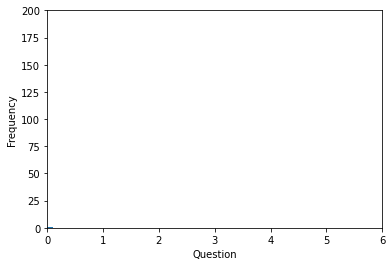

In [9]:
plt.xlim([0,6])
plt.ylim([0,200])
plt.xlabel('Question')
plt.ylabel('Frequency')

plt.hist(one)
plt.hist(two)
